In [1]:
#On installe pyarrow
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [24]:
#On importe
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [25]:
# Création du data frame
taxi = pd.read_parquet('yellow_tripdata_2023-03.parquet', engine='pyarrow')
engine='pyarrow'

In [26]:
# On regarde si le fichier est correctement charger et lisible
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [27]:
# On regarde le nombre de valeurs et de variables
taxi.shape

(3403766, 19)

In [28]:
#On regarde les variables
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403766 entries, 0 to 3403765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [29]:
#On extrait chaque parti de date du tpep_pickup_datetime
taxi.insert(0, 'year', taxi['tpep_pickup_datetime'].dt.year)
taxi.insert(1, 'month', taxi['tpep_pickup_datetime'].dt.month)
taxi.insert(2, 'day', taxi['tpep_pickup_datetime'].dt.day)
taxi.insert(3, 'hour', taxi['tpep_pickup_datetime'].dt.hour)
taxi.insert(4, 'trip_duration', (taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']).dt.total_seconds() / 3600)

<AxesSubplot:xlabel='total_amount'>

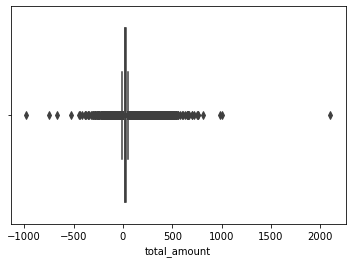

In [30]:
#On regarde les valeurs de total_amount
sns.boxplot(x=taxi['total_amount'])

In [31]:
#On supprime les valeurs aberrantes 
taxi = taxi[taxi['total_amount'] <= 2000]
taxi = taxi[taxi['total_amount'] > 0]

<AxesSubplot:xlabel='total_amount'>

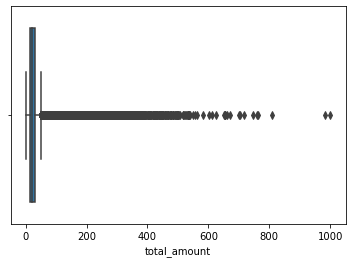

In [32]:
#On regarde les valeurs de total_amount après modif
sns.boxplot(x=taxi['total_amount'])

<AxesSubplot:xlabel='trip_duration'>

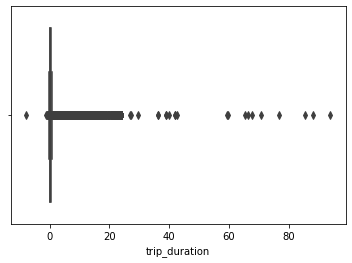

In [33]:
#On regarde les valeurs de trip_duration
sns.boxplot(x=taxi['trip_duration'])

In [34]:
#On supprime les valeurs aberrantes 
taxi = taxi[taxi['trip_duration'] <= 6]
taxi = taxi[taxi['trip_duration'] > 0]

<AxesSubplot:xlabel='trip_duration'>

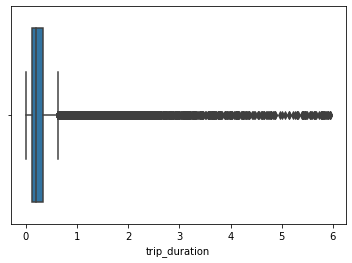

In [35]:
#On regarde les valeurs de trip_duration après modif
sns.boxplot(x=taxi['trip_duration'])

<AxesSubplot:xlabel='passenger_count'>

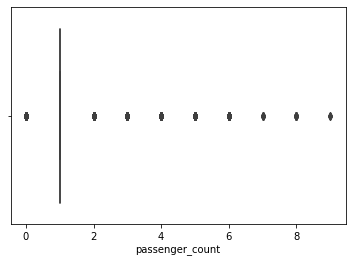

In [36]:
#On regarde les valeurs de passenger_count 
sns.boxplot(x=taxi['passenger_count'])

In [37]:
#On supprime les valeurs aberrantes
taxi = taxi[taxi['passenger_count'] <= 4]
taxi = taxi[taxi['passenger_count'] > 0]

<AxesSubplot:xlabel='passenger_count'>

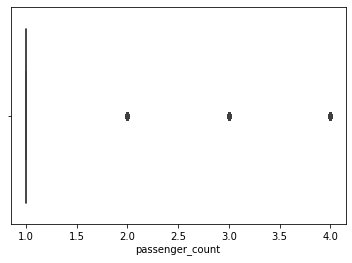

In [38]:
#On regarde les valeurs de passenger_count  après modif
sns.boxplot(x=taxi['passenger_count'])

<AxesSubplot:xlabel='trip_distance'>

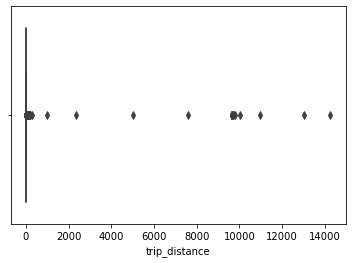

In [39]:
#On regarde les valeurs de trip_distance 
sns.boxplot(x=taxi['trip_distance'])

In [40]:
#On supprime les valeurs aberrantes
taxi = taxi[taxi['trip_distance'] <= 500]
taxi = taxi[taxi['trip_distance'] > 0]

<AxesSubplot:xlabel='trip_distance'>

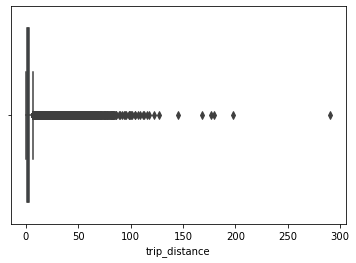

In [41]:
#On regarde les valeurs de trip_dsitance après modif
sns.boxplot(x=taxi['trip_distance'])

In [42]:
# On supprimes les variables jugées inutiles pour la prédiction et demandés par le client
taxi = taxi.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],axis=1)

In [43]:
# On check si il y a des valeurs manquante
taxi.isnull().sum()

year               0
month              0
day                0
hour               0
trip_duration      0
VendorID           0
passenger_count    0
trip_distance      0
RatecodeID         0
PULocationID       0
DOLocationID       0
payment_type       0
total_amount       0
dtype: int64

<AxesSubplot:>

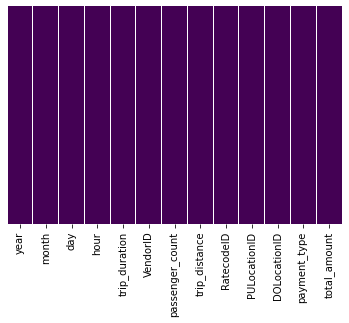

In [44]:
#On vérifie qu'il n'y ait plus de valeurs manquantes 
sns.heatmap(taxi.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
#On standardise les données

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des features et de la target
X = taxi.drop('total_amount', axis=1) # Axis 1: colonne
y = taxi['total_amount']

# Normalisation des données
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [46]:
#On split les données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [48]:
#Entraînez un modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [49]:
#Voir le coeff de détermination et l'erreur quadratique moyenne
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
predicted_values= reg.predict(X_test)
print('coefficient de détermination (R²) :', r2_score(y_test,predicted_values))
print('erreur quadratique moyenne :', mean_squared_error(y_test,predicted_values))

coefficient de détermination (R²) : 0.9067054342890402
erreur quadratique moyenne : 45.511208177712


In [50]:
#Mise en place du réseau de neurones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) 

In [51]:
#compilation du modèle de neurones
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])

In [52]:
#entrainement du modèle de neurones
history = model.fit(X_train, y_train, epochs=8, batch_size=10, validation_split=0.2)

Epoch 1/8
199217/199217 [==============================] - 206s 1ms/step - loss: 30.2812 - mean_squared_error: 30.2812 - val_loss: 19.1243 - val_mean_squared_error: 19.1243
Epoch 2/8
199217/199217 [==============================] - 202s 1ms/step - loss: 19.8702 - mean_squared_error: 19.8702 - val_loss: 16.6391 - val_mean_squared_error: 16.6391
Epoch 3/8
199217/199217 [==============================] - 202s 1ms/step - loss: 19.1343 - mean_squared_error: 19.1343 - val_loss: 18.3065 - val_mean_squared_error: 18.3065
Epoch 4/8
199217/199217 [==============================] - 200s 1ms/step - loss: 20.4967 - mean_squared_error: 20.4967 - val_loss: 16.2188 - val_mean_squared_error: 16.2188
Epoch 5/8
199217/199217 [==============================] - 201s 1ms/step - loss: 18.1937 - mean_squared_error: 18.1937 - val_loss: 15.9338 - val_mean_squared_error: 15.9338
Epoch 6/8
199217/199217 [==============================] - 204s 1ms/step - loss: 17.0758 - mean_squared_error: 17.0758 - val_loss: 15.3

In [54]:
#Voir le coeff de détermination et l'erreur quadratique moyenne
Yp= model.predict(X_test)
print('erreur quadratique moyenne :', mean_squared_error(y_test,Yp))
print('coefficient de détermination (R²) :', r2_score(y_test,Yp))

19455/19455 [==============================] - 12s 612us/step
erreur quadratique moyenne : 15.59256911227016
coefficient de détermination (R²) : 0.9680364019788915


In [ ]:
!pip install xgboost

In [61]:
#Mise en place modèle XGBoost
import xgboost as xgb
xgmodel = xgb.XGBRegressor(objective='reg:squarederror', learning_rate = 0.25, max_depth=9, n_estimators=100)

In [62]:
#On split les données pour XGBoost
X_train_xg, Xtest_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=0.2, random_state=42) 

In [63]:
#entrainement du modèle XGBoost
xgmodel.fit(X_train_xg, y_train_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
y_pred_xg = xgmodel.predict(Xtest_xg)

In [68]:
#Voir le coeff de détermination et l'erreur quadratique moyenne
mse = mean_squared_error(y_test_xg, y_pred_xg, squared=False)
r2 = r2_score(y_test_xg, y_pred_xg)

print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 3.4780022248504054
R2 : 0.9752030827035931
